<a href="https://colab.research.google.com/github/rameshboggu36/Delhivery/blob/master/Delhivery_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Delhivery Dataset: Feature Engineering and Hypothesis Testing:__

* Clean the raw dataset to get meaningful features from it.
* Perform Hypothesis testing on different scenarios.  

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [339]:
!gdown --fuzzy https://drive.google.com/file/d/1QIAZ3Of5JmHXpNFN9NeMiTlikuCnB2F2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QIAZ3Of5JmHXpNFN9NeMiTlikuCnB2F2
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 60.2MB/s]


In [340]:
df = pd.read_csv("/content/delhivery_data.csv")

In [341]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [342]:
df['data'].value_counts()

data
training    104858
test         40009
Name: count, dtype: int64

# __Data Preprocessing:__

* __Understanding the data__

In [343]:
df.shape

(144867, 24)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

we can see there are lots of object type dtypes. To change those to relevant dtypes, we will change the columns with time to datetime dtype.

In [345]:
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in time_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

deatils about the features of dataset
* osrm_time: OSRM is "Open Source Routing Machine" which tries to find the shortest path between the source and destination. osrm_time is the minimum time to reach the destination.
* actual_time: this is the actual time taken by the vehicle to reach the destination. this time might be greater than the osrm_time due to lots of factors like traffic or road blockage, etc...
* factor: this is the factor by which actual_time differs by osrm_time.
* segment: some orders might have divided into segments to reach the destination. here the segment time and segment distance are of the last segment to reach the destination, not considering the remaining segments.

In [347]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,NaT,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [348]:
df['segment_key'] = df['trip_uuid'] +'-'+ df['source_center'] +'-'+ df['destination_center']

In [349]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320-IND388121AAA-IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320-IND388121AAA-IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320-IND388121AAA-IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320-IND388121AAA-IND388620AAB


In [350]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_time'] = df['trip_creation_time'].dt.strftime('%H:%M')
df['trip_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_day'] = df['trip_creation_time'].dt.day

In [351]:
df[['trip_year','trip_month','trip_time','trip_week']]

,trip_year,trip_month,trip_time,trip_week
0,2018,9,02:35,38
1,2018,9,02:35,38
2,2018,9,02:35,38
3,2018,9,02:35,38
4,2018,9,02:35,38
...,...,...,...,...
144862,2018,9,16:24,38
144863,2018,9,16:24,38
144864,2018,9,16:24,38
144865,2018,9,16:24,38


In [352]:
df.iloc[:, :16]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,NaT,27.637279
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667


In [353]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() /(3600)
df['cutoff_factor']

0          9
1         18
2         27
3         36
4         39
          ..
144862    45
144863    54
144864    63
144865    72
144866    70
Name: cutoff_factor, Length: 144867, dtype: int64

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [355]:
df['source_name'].str.lower()
df['destination_name'].str.lower()

0         khambhat_motvddpp_d (gujarat)
1         khambhat_motvddpp_d (gujarat)
2         khambhat_motvddpp_d (gujarat)
3         khambhat_motvddpp_d (gujarat)
4         khambhat_motvddpp_d (gujarat)
                      ...              
144862    gurgaon_bilaspur_hb (haryana)
144863    gurgaon_bilaspur_hb (haryana)
144864    gurgaon_bilaspur_hb (haryana)
144865    gurgaon_bilaspur_hb (haryana)
144866    gurgaon_bilaspur_hb (haryana)
Name: destination_name, Length: 144867, dtype: object

In [356]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'trip_year', 'trip_month', 'trip_hour', 'trip_time',
       'trip_week', 'trip_day', 'od_time_diff_hour'],
      dtype='object')

In [357]:
final = df[['data', 'trip_year', 'trip_month', 'trip_week','trip_day','trip_time', 'route_type',
       'source_name', 'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_distance','actual_time',
       'osrm_time', 'factor','segment_osrm_distance', 'segment_actual_time',
       'segment_osrm_time',  'segment_factor',
       'segment_key', 'od_time_diff_hour']]

In [358]:
final.head()

,data,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,14.0,11.0,1.272727,11.9653,14.0,11.0,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
1,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,24.0,20.0,1.200000,9.7590,10.0,9.0,1.111111,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
2,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,40.0,28.0,1.428571,10.8152,16.0,7.0,2.285714,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
3,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,62.0,40.0,1.550000,13.0224,21.0,12.0,1.750000,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
4,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,68.0,44.0,1.545455,3.9153,6.0,5.0,1.200000,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894


 * __Handling null values__

In [359]:
final.isnull().sum()*100/len(final)

data                              0.000000
trip_year                         0.000000
trip_month                        0.000000
trip_week                         0.000000
trip_day                          0.000000
trip_time                         0.000000
route_type                        0.000000
source_name                       0.202254
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
osrm_distance                     0.000000
actual_time                       0.000000
osrm_time                         0.000000
factor                            0.000000
segment_osrm_distance             0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_factor                    0.000000
segment_key                       0.000000
od_time_diff_hour                 0.000000
dtype: floa

# as the percent of missing values is very less, we can remove these values from the data.

In [360]:
final.dropna(inplace=True)

In [361]:
final.isnull().sum()*100/len(final)

data                              0.0
trip_year                         0.0
trip_month                        0.0
trip_week                         0.0
trip_day                          0.0
trip_time                         0.0
route_type                        0.0
source_name                       0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
actual_distance_to_destination    0.0
osrm_distance                     0.0
actual_time                       0.0
osrm_time                         0.0
factor                            0.0
segment_osrm_distance             0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_factor                    0.0
segment_key                       0.0
od_time_diff_hour                 0.0
dtype: float64

* __Handling duplicate values__

In [362]:
final.duplicated().sum()

0

In [363]:
final.shape

(144316, 23)

# __Visualizing the Data__:

* __Univariate Analysis__

In [364]:
final.head(1)

,data,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,14.0,11.0,1.272727,11.9653,14.0,11.0,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894


* Categorical data (route_type)

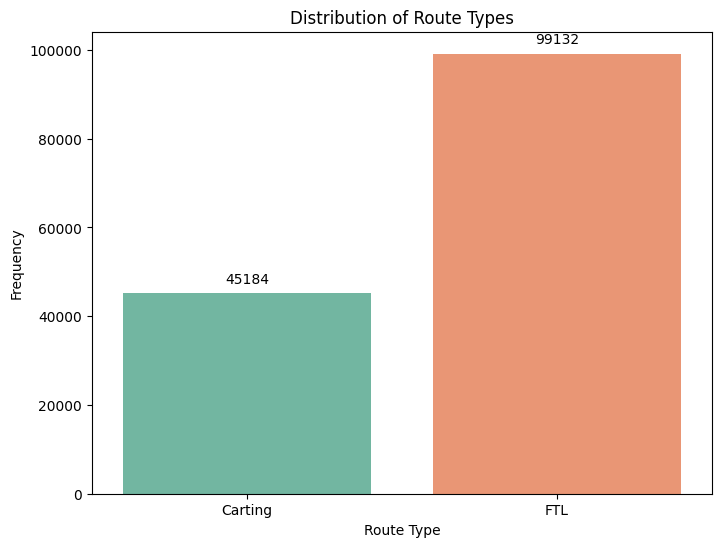

In [365]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=final, x='route_type', palette='Set2')
plt.title('Distribution of Route Types')
plt.xlabel('Route Type')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

In [366]:
route_type_counts = final['route_type'].value_counts()

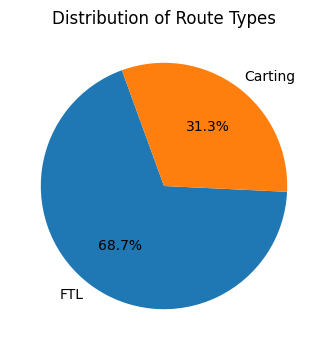

In [367]:
plt.figure(figsize=(6, 4))
plt.pie(route_type_counts, labels=route_type_counts.index, autopct='%1.1f%%', startangle=110)
plt.title('Distribution of Route Types')
plt.show()

* Categorical (source_name)

In [368]:
top_source_names = final['source_name'].value_counts().nlargest(15)
df_top_15 = final[final['source_name'].isin(top_source_names.index)]

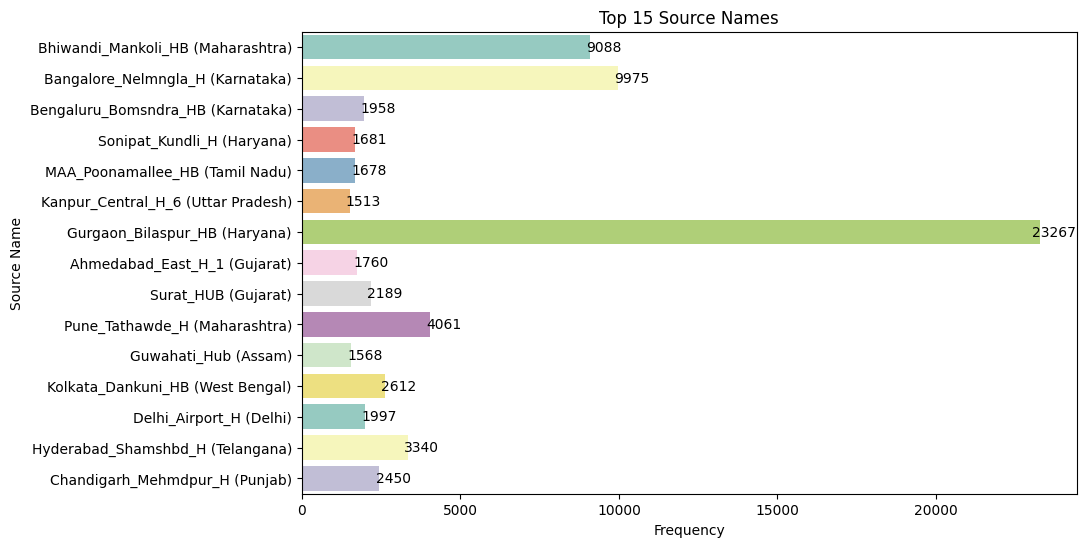

In [369]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_top_15, y='source_name', palette='Set3')
plt.title('Top 15 Source Names')
plt.xlabel('Frequency')
plt.ylabel('Source Name')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'center', va = 'center',
                xytext = (10, 0),
                textcoords = 'offset points')

plt.show()

* Categorical (destination_name)

In [370]:
top_source_names = final['destination_name'].value_counts().nlargest(15)
df_des_top_15 = final[final['destination_name'].isin(top_source_names.index)]

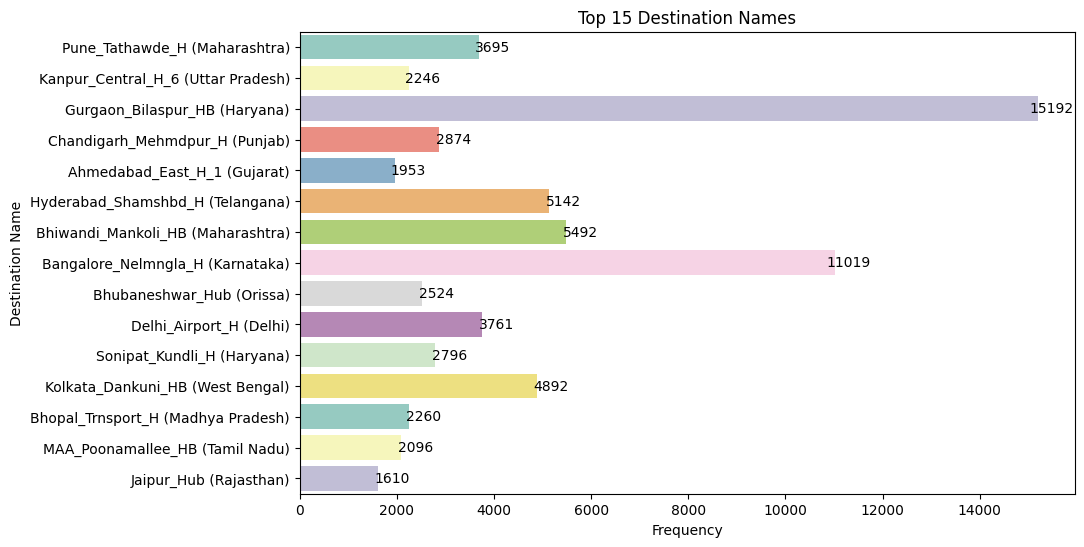

In [371]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_des_top_15, y='destination_name', palette='Set3')
plt.title('Top 15 Destination Names')
plt.xlabel('Frequency')
plt.ylabel('Destination Name')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'center', va = 'center',
                xytext = (10, 0),
                textcoords = 'offset points')

plt.show()

In [372]:
def analyze_and_clean_column(df, column_name,outlier_factor):
    # Print descriptive statistics
    print(f"Descriptive Statistics of {column_name}:")
    print(df[column_name].describe())

    # Create a figure with two subplots side by side
    plt.figure(figsize=(14, 6))

    # Plot histogram on the left subplot
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column_name, bins=20, color='skyblue')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    skewness = df[column_name].skew()
    plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

    # Plot density plot on the right subplot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=column_name, shade=True, color='skyblue')
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Density')
    skewness = df[column_name].skew()
    plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - outlier_factor * IQR
    upper_fence = Q3 + outlier_factor * IQR
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Lower Fence:", lower_fence)
    print("Upper Fence:", upper_fence)



    # Filter outliers and clean dataframe
    df_clean = df[(df[column_name] >= lower_fence) & (df[column_name] <= upper_fence)]

    print(f'length before:{len(df)} and length after:{len(df_clean)}')

    plt.figure(figsize=(14,6))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.subplot(2, 2, 2)
    sns.violinplot(data=df, x=column_name, color='skyblue')
    plt.title(f'Violin Plot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.subplot(2, 2, 3)
    sns.boxplot(data=df_clean, x=column_name, color='skyblue')
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.subplot(2,2,4)
    sns.violinplot(data=df_clean, x=column_name, color='skyblue')
    plt.title(f'Violin Plot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.tight_layout()
    plt.show()
    data_retained_percentage = (len(df_clean) / len(df)) * 100
    print(f"Data retained after cleaning: {data_retained_percentage:.2f}%")
    return df_clean

* Numerical (actual_distance_to_destination)

Descriptive Statistics of actual_distance_to_destination:
count    144316.000000
mean        234.708498
std         345.480571
min           9.000045
25%          23.352027
50%          66.135322
75%         286.919294
max        1927.447705
Name: actual_distance_to_destination, dtype: float64


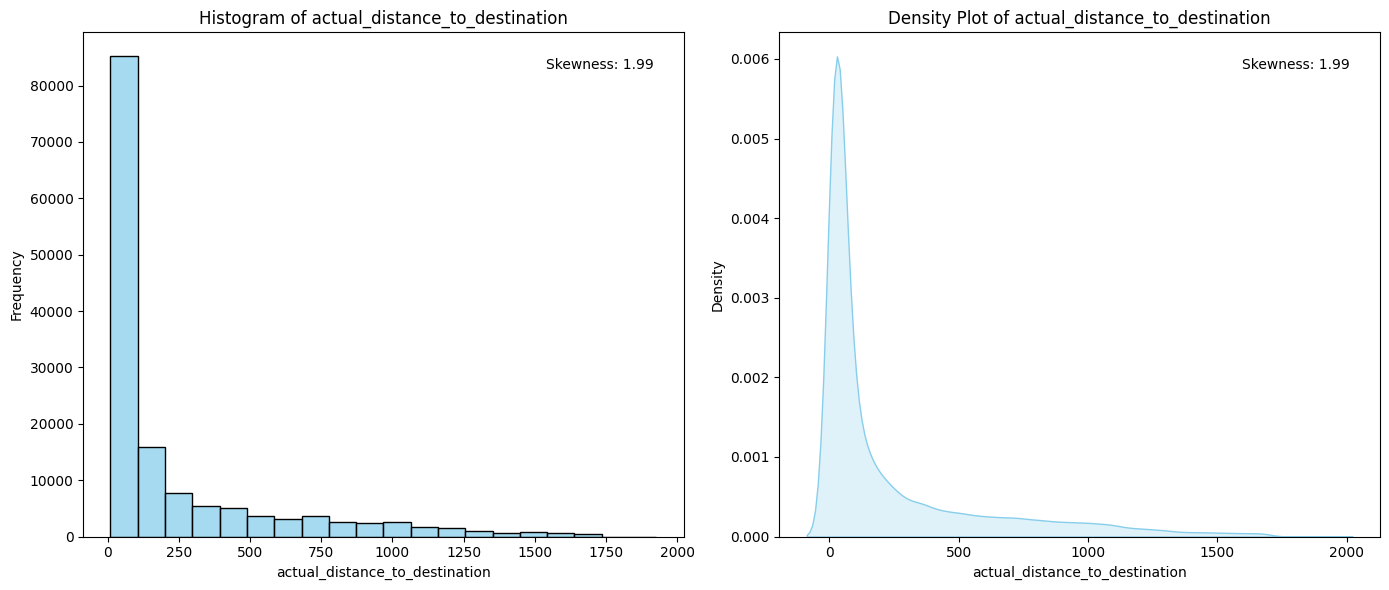

Q1: 23.352026892994942
Q3: 286.9192937699907
IQR: 263.56726687699575
Lower Fence: -503.78250686099653
Upper Fence: 814.0538275239821
length before:144316 and length after:130715


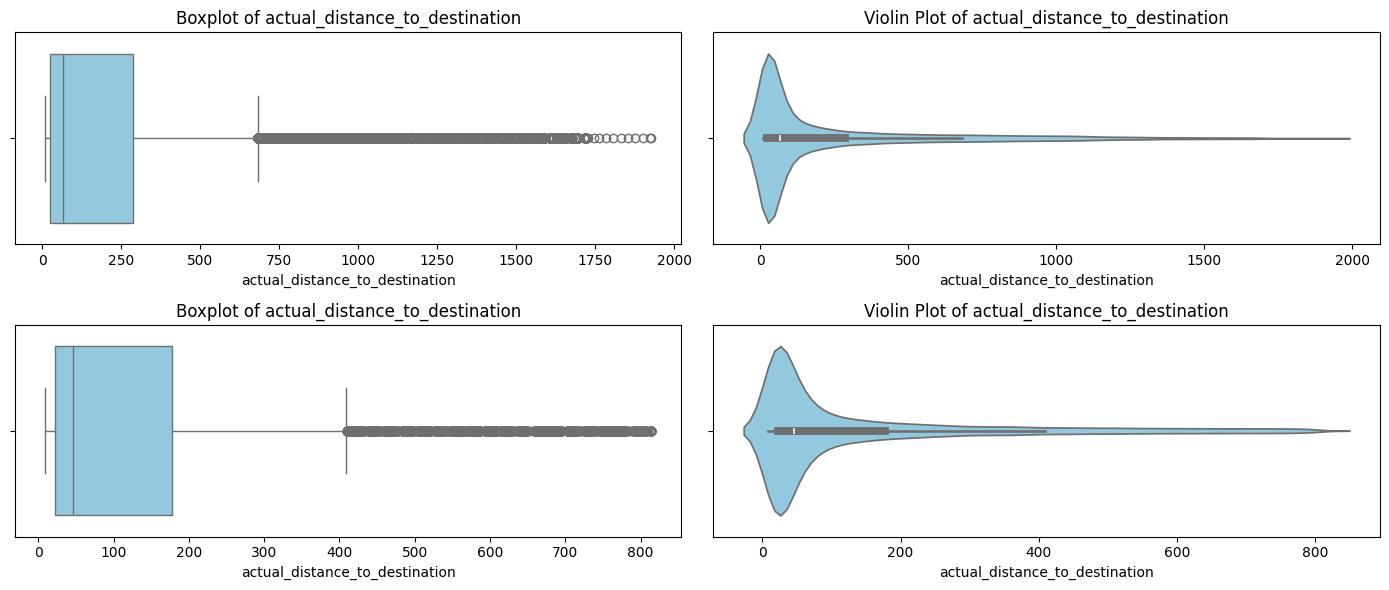

Data retained after cleaning: 90.58%
Descriptive Statistics of osrm_distance:
count    130715.000000
mean        173.120533
std         228.239906
min           9.008200
25%          28.069550
50%          63.229900
75%         218.224000
max        1117.469700
Name: osrm_distance, dtype: float64


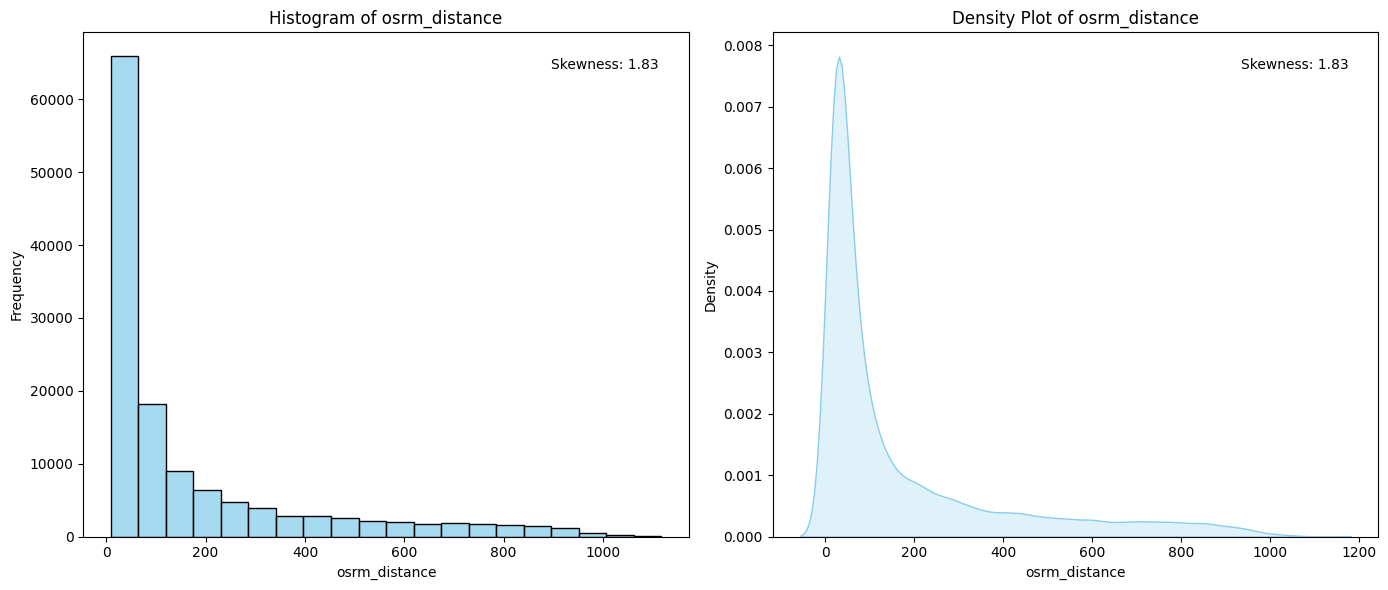

Q1: 28.06955
Q3: 218.224
IQR: 190.15445
Lower Fence: -352.23935
Upper Fence: 598.5328999999999
length before:130715 and length after:119642


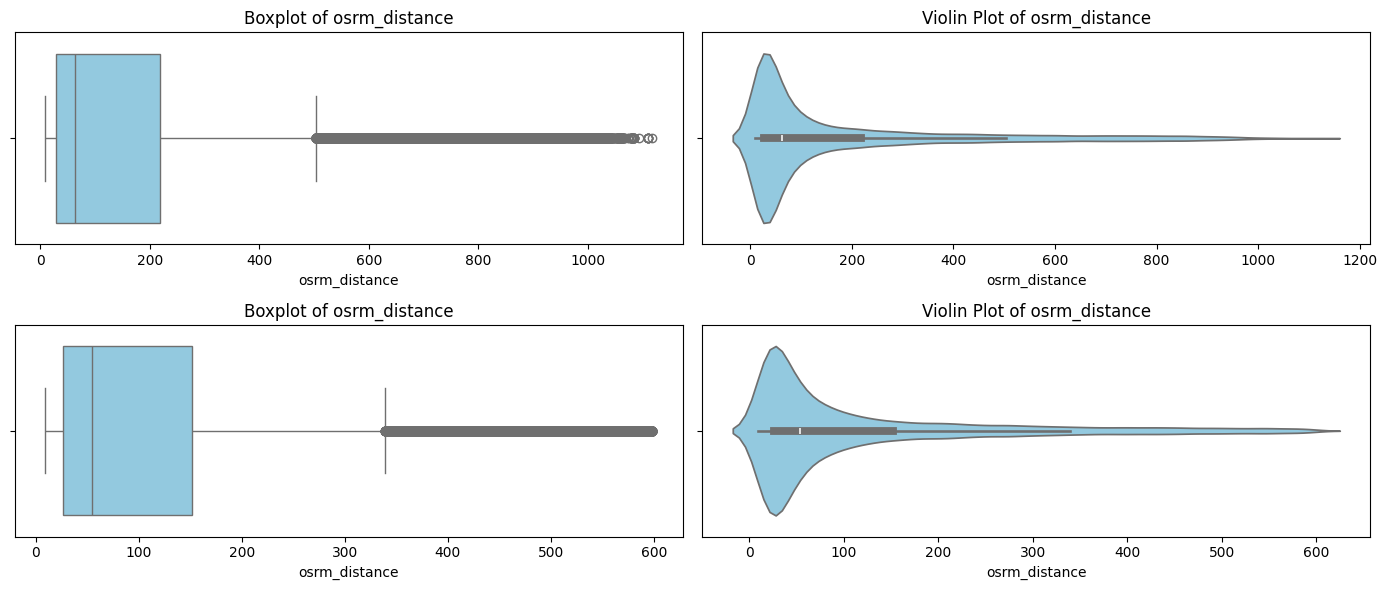

Data retained after cleaning: 91.53%
Descriptive Statistics of actual_time:
count    119642.000000
mean        182.871383
std         208.511256
min           9.000000
25%          44.000000
50%          93.000000
75%         240.000000
max        2664.000000
Name: actual_time, dtype: float64


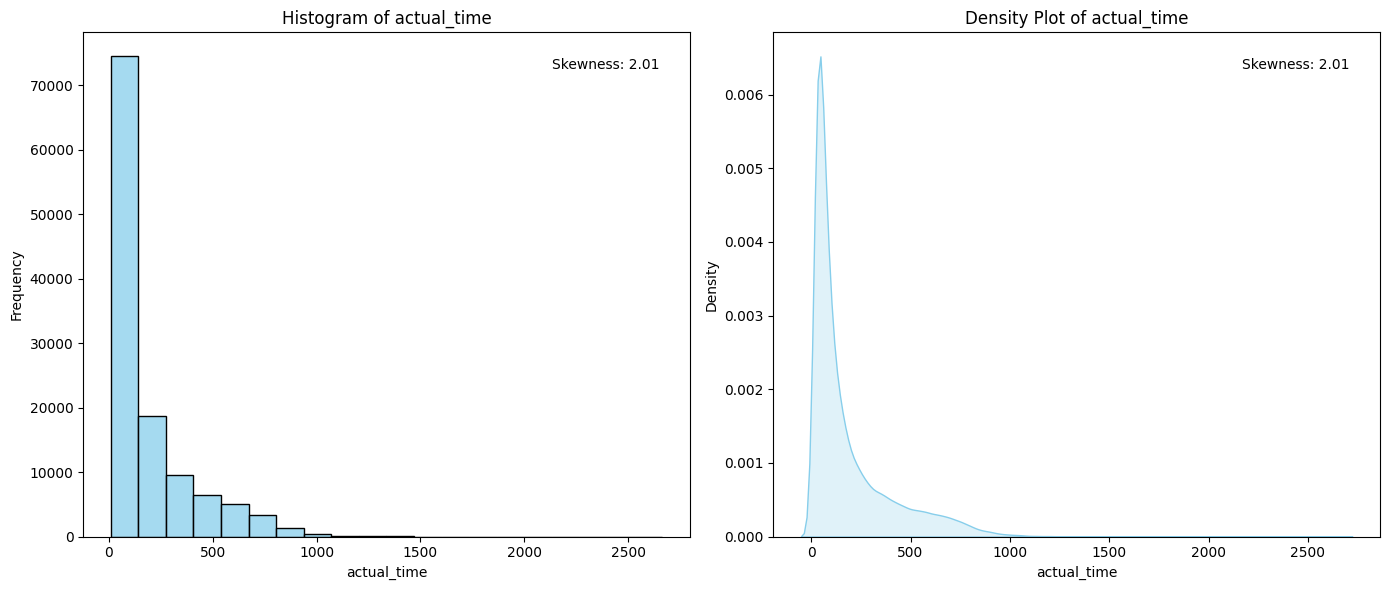

Q1: 44.0
Q3: 240.0
IQR: 196.0
Lower Fence: -446.0
Upper Fence: 730.0
length before:119642 and length after:115993


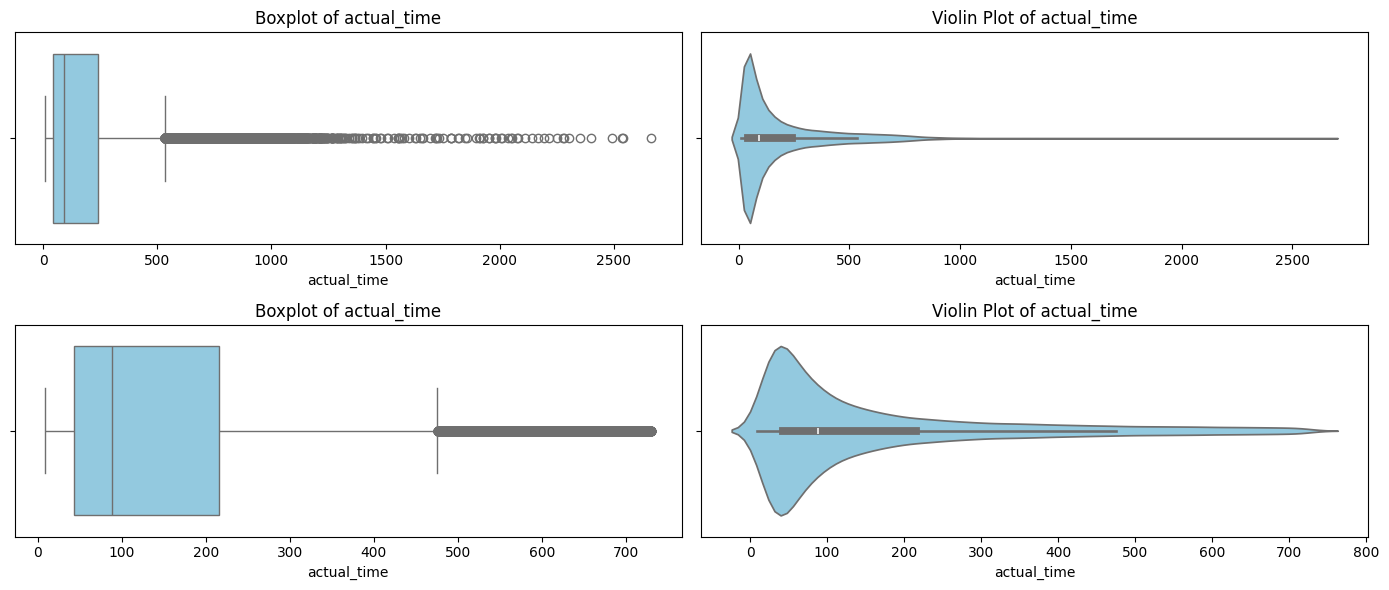

Data retained after cleaning: 96.95%
Descriptive Statistics of osrm_time:
count    115993.000000
mean         83.292966
std          89.810412
min           6.000000
25%          23.000000
50%          45.000000
75%         105.000000
max         495.000000
Name: osrm_time, dtype: float64


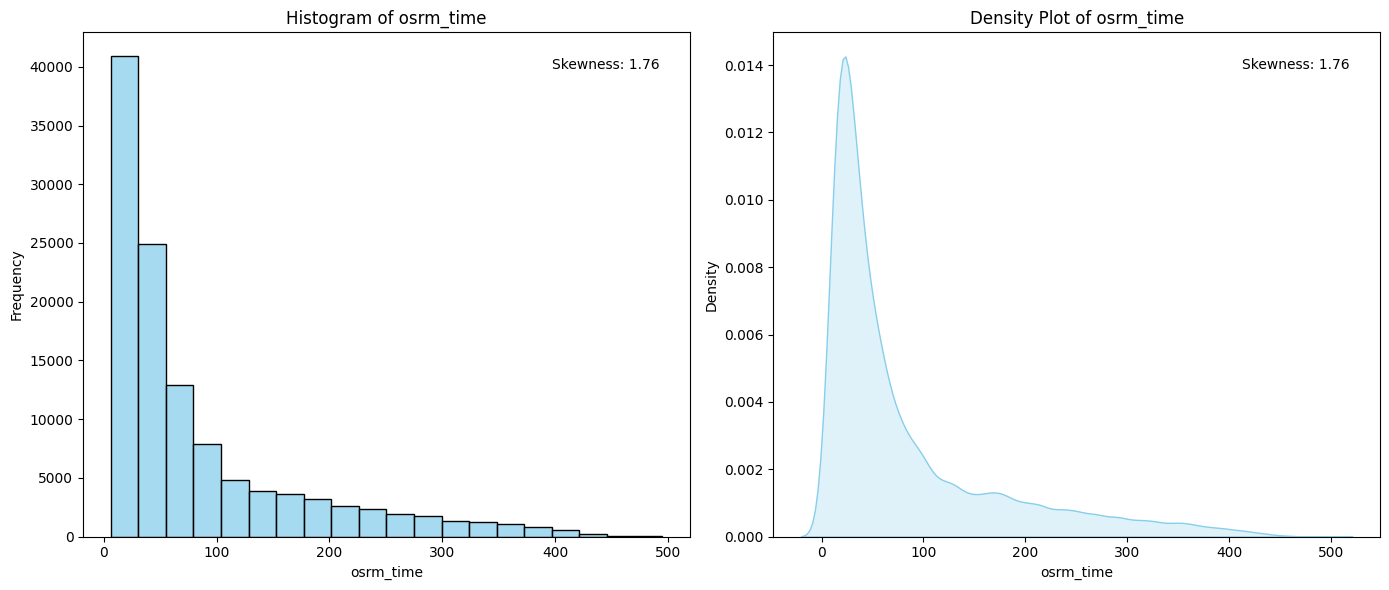

Q1: 23.0
Q3: 105.0
IQR: 82.0
Lower Fence: -182.0
Upper Fence: 310.0
length before:115993 and length after:111303


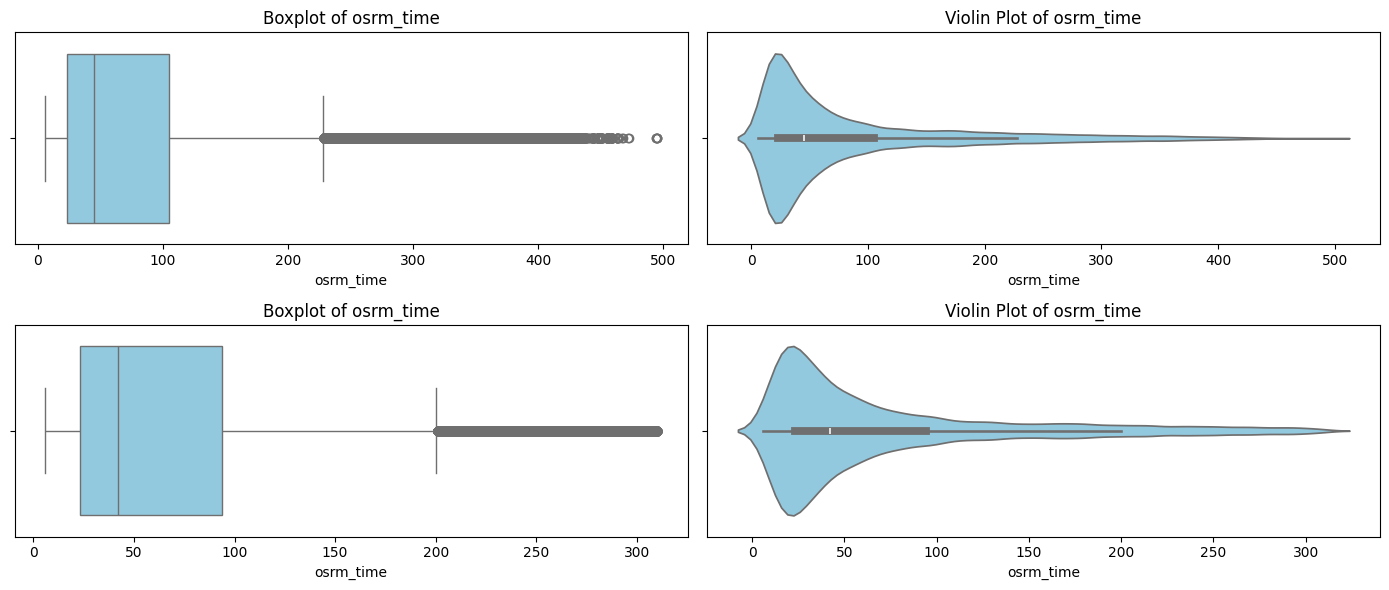

Data retained after cleaning: 95.96%
Descriptive Statistics of segment_actual_time:
count    111303.000000
mean         33.404293
std          37.200282
min        -211.000000
25%          17.000000
50%          27.000000
75%          39.000000
max         720.000000
Name: segment_actual_time, dtype: float64


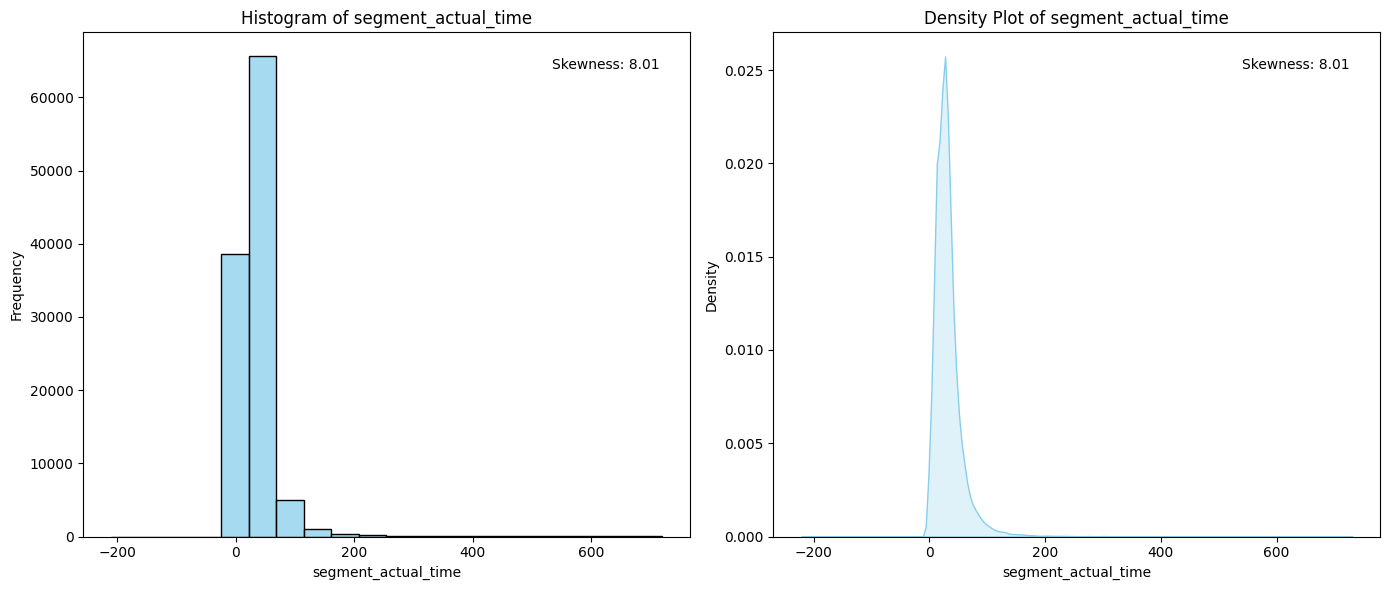

Q1: 17.0
Q3: 39.0
IQR: 22.0
Lower Fence: -38.0
Upper Fence: 94.0
length before:111303 and length after:108106


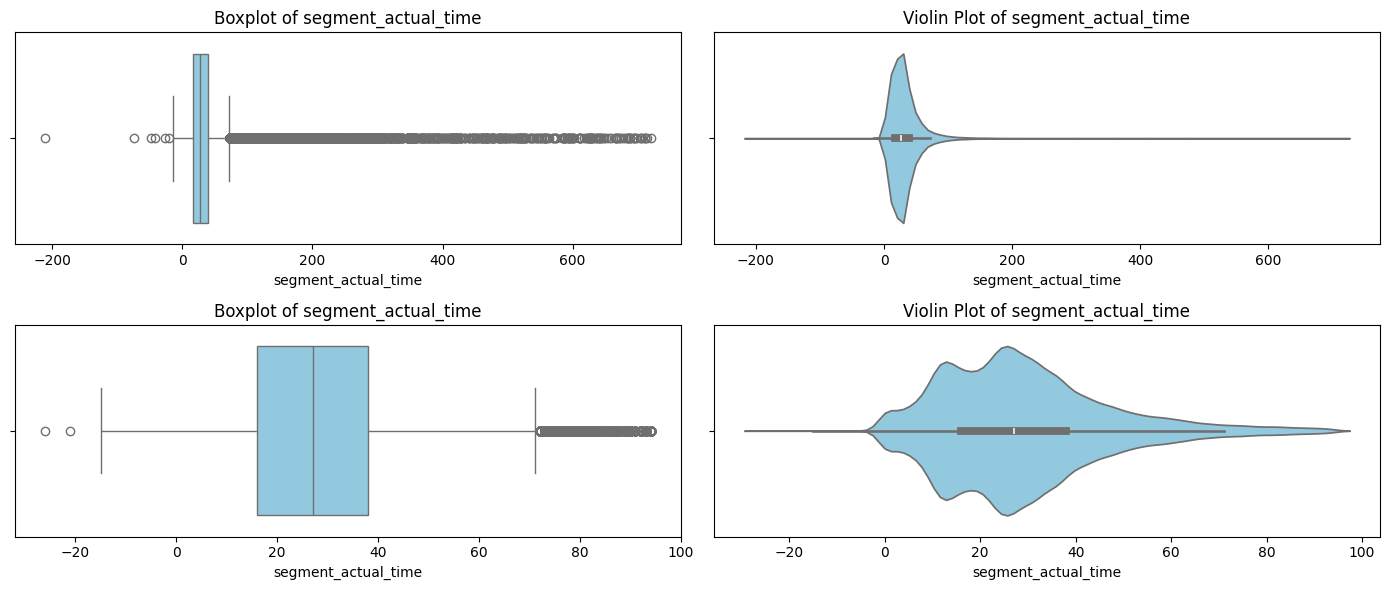

Data retained after cleaning: 97.13%
Descriptive Statistics of segment_osrm_time:
count    108106.000000
mean         16.749931
std          11.434527
min           0.000000
25%           9.000000
50%          16.000000
75%          21.000000
max         191.000000
Name: segment_osrm_time, dtype: float64


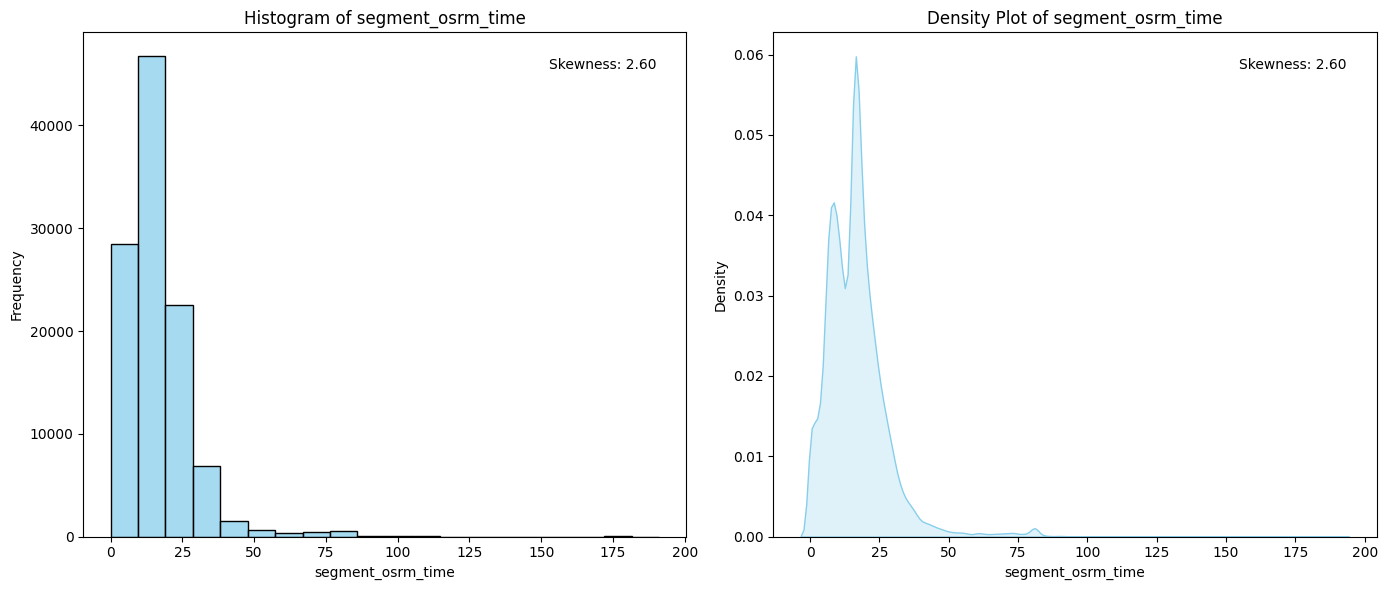

Q1: 9.0
Q3: 21.0
IQR: 12.0
Lower Fence: -21.0
Upper Fence: 51.0
length before:108106 and length after:106368


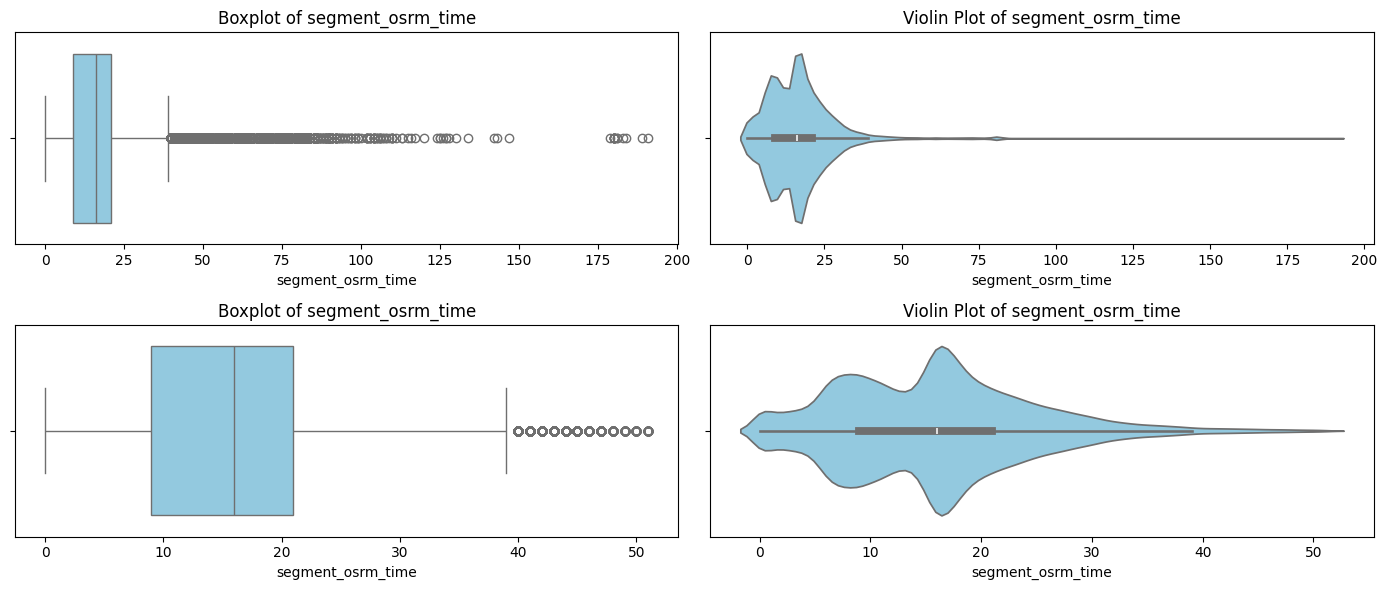

Data retained after cleaning: 98.39%
Descriptive Statistics of segment_osrm_distance:
count    106368.000000
mean         19.220439
std          10.454756
min           0.000000
25%          10.645975
50%          21.233800
75%          25.909050
max          73.378100
Name: segment_osrm_distance, dtype: float64


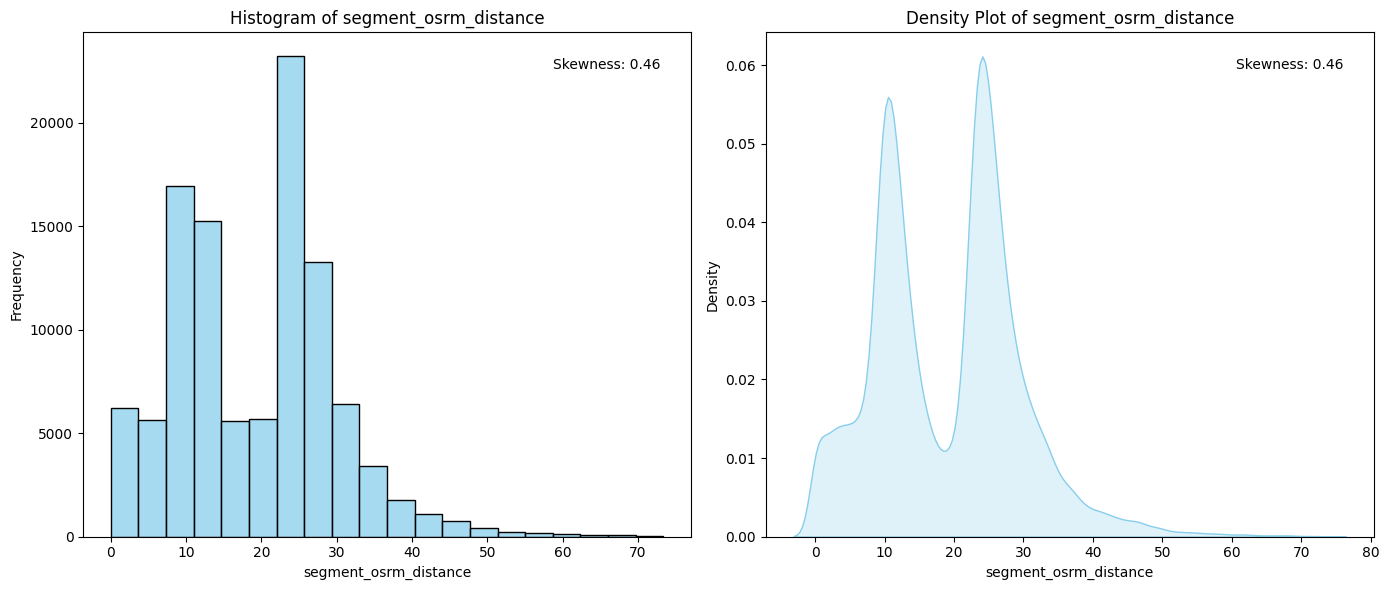

Q1: 10.645975
Q3: 25.90905
IQR: 15.263075
Lower Fence: -27.5117125
Upper Fence: 64.0667375
length before:106368 and length after:106253


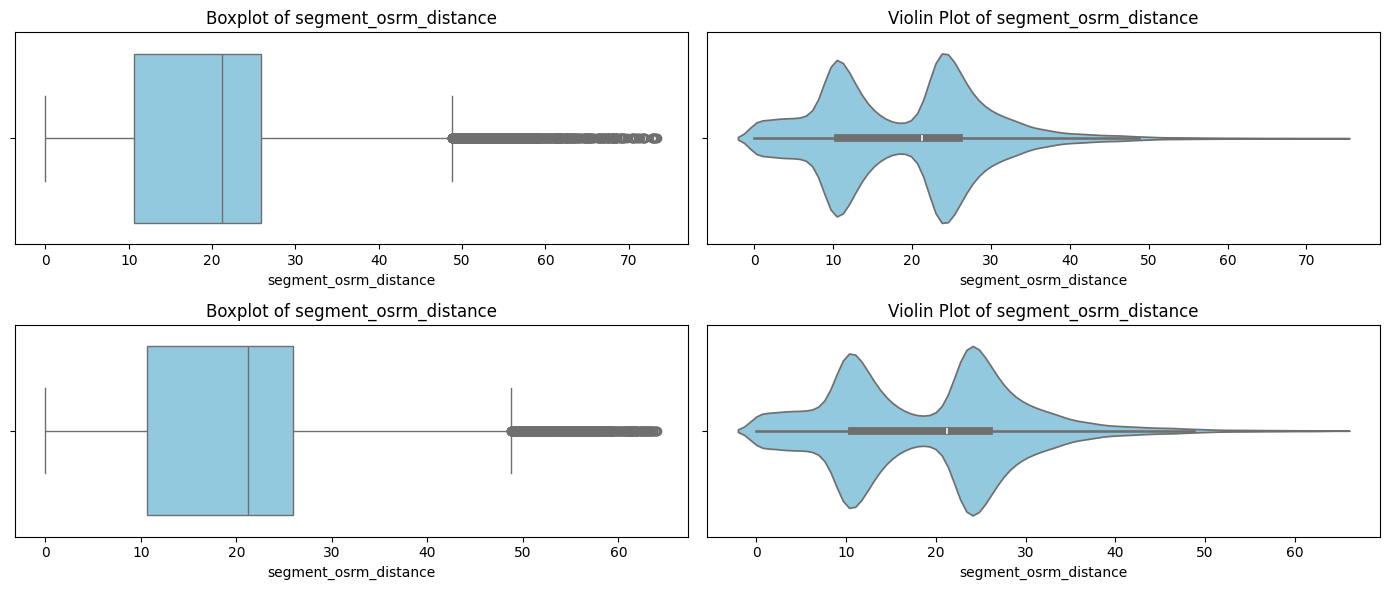

Data retained after cleaning: 99.89%


In [373]:
df_clean = analyze_and_clean_column(final, 'actual_distance_to_destination',2)
df_clean = analyze_and_clean_column(df_clean, 'osrm_distance',2)
df_clean = analyze_and_clean_column(df_clean, 'actual_time',2.5)
df_clean = analyze_and_clean_column(df_clean, 'osrm_time',2.5)
df_clean = analyze_and_clean_column(df_clean, 'segment_actual_time',2.5)
df_clean = analyze_and_clean_column(df_clean, 'segment_osrm_time',2.5)
df_clean = analyze_and_clean_column(df_clean, 'segment_osrm_distance',2.5)

In [374]:
df_clean.head(1)

,data,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,training,2018,9,38,20,02:35,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,14.0,11.0,1.272727,11.9653,14.0,11.0,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894


* __Bivariate Analysis__:

# Numerical - Numerical (actual_distance_to_destination, actual_time)

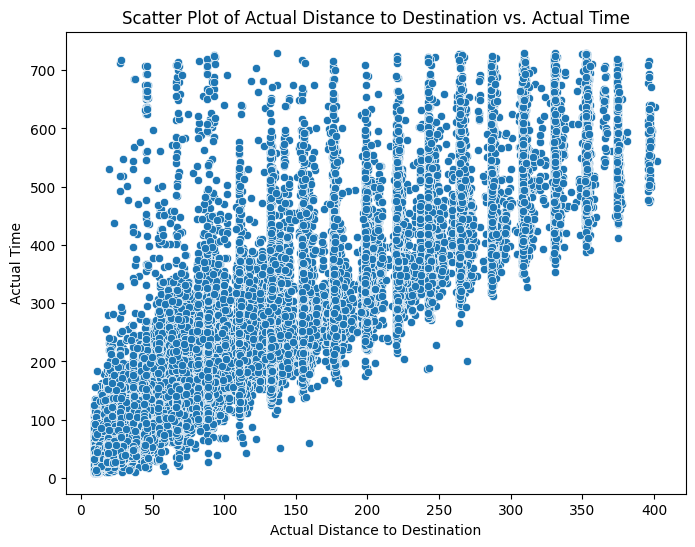

In [375]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='actual_distance_to_destination', y='actual_time')
plt.title('Scatter Plot of Actual Distance to Destination vs. Actual Time')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Actual Time')
plt.show()

In [376]:
correlation = df_clean[['actual_distance_to_destination', 'actual_time']].corr().iloc[0, 1]
print("Correlation coefficient between actual_distance_to_destination and actual_time:", correlation)

Correlation coefficient between actual_distance_to_destination and actual_time: 0.9322944595444838


* as pearson coefficient is near to +1, actual_distance_to_destination and actual_time has strong positive relationship.

# Numerical - Numerical (osrm_distance_to_destination - osrm_time)

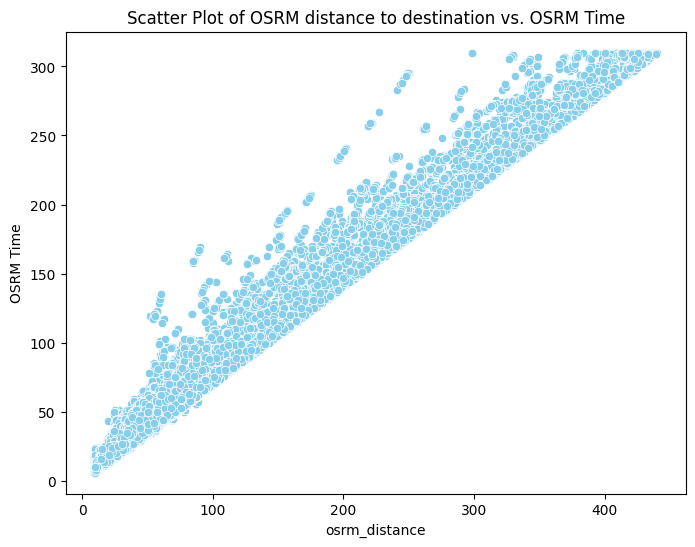

In [377]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='osrm_distance', y='osrm_time', color='skyblue')
plt.title('Scatter Plot of OSRM distance to destination vs. OSRM Time')
plt.xlabel('osrm_distance')
plt.ylabel('OSRM Time')
plt.show()

In [378]:
correlation = df_clean[['osrm_distance', 'osrm_time']].corr().iloc[0, 1]
print("Correlation coefficient between osrm_distance and osrm_time:", correlation)

Correlation coefficient between osrm_distance and osrm_time: 0.9916658989019962


* as pearson coefficient is near to +1, osrm_distance and osrm_time has strong positive relationship.

# Numerical - Numerical (actual_distance_to_destination, osrm_distance)

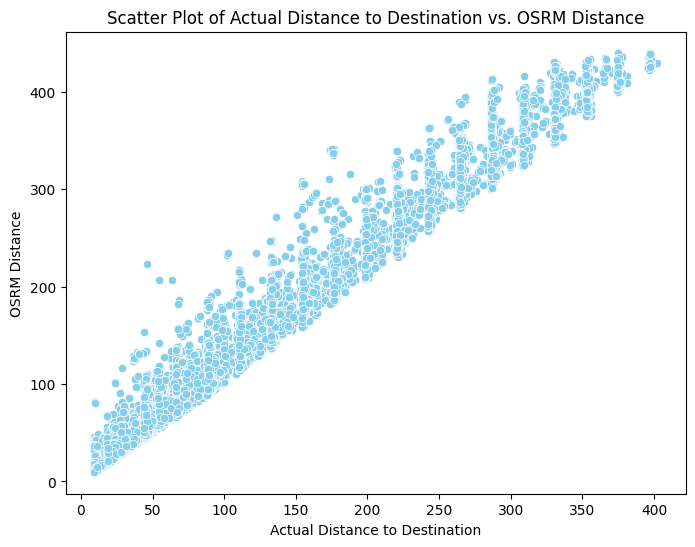

In [379]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='actual_distance_to_destination', y='osrm_distance', color='skyblue')
plt.title('Scatter Plot of Actual Distance to Destination vs. OSRM Distance')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('OSRM Distance')
plt.show()

In [380]:
correlation_actual_osrm = df_clean[['actual_distance_to_destination', 'osrm_distance']].corr().iloc[0, 1]
print("Correlation coefficient between Actual Distance to Destination and OSRM Distance:", correlation_actual_osrm)

Correlation coefficient between Actual Distance to Destination and OSRM Distance: 0.9929391008421214


* as pearson coefficient is near to +1, actual_distance_to_destination and osrm_distance has strong positive relationship.

# Numerical - Categorical (actual_time - route_type)

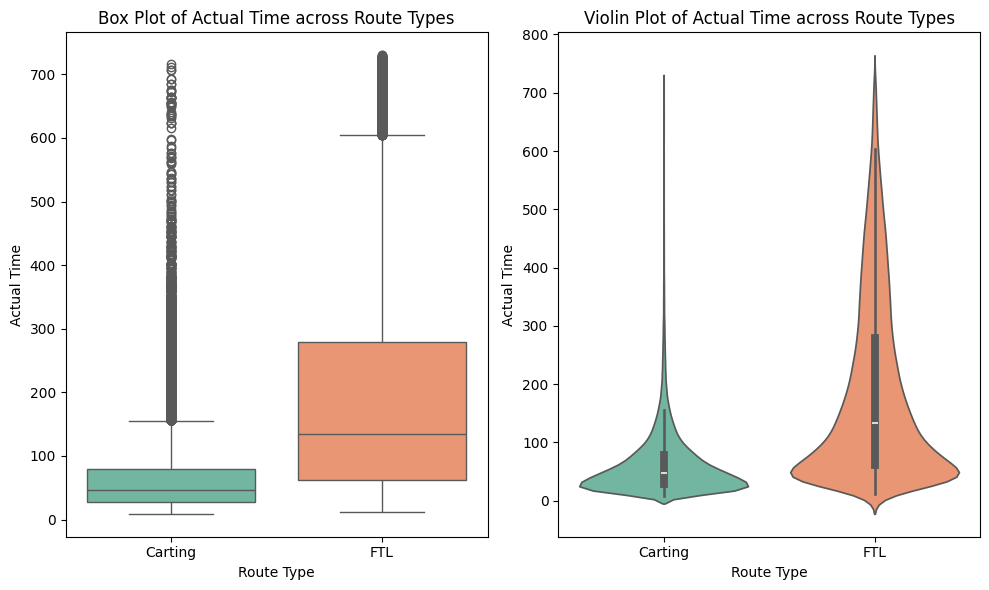

In [381]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='route_type', y='actual_time',palette='Set2')
plt.title('Box Plot of Actual Time across Route Types')
plt.xlabel('Route Type')
plt.ylabel('Actual Time')

plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, x='route_type', y='actual_time',palette='Set2')
plt.title('Violin Plot of Actual Time across Route Types')
plt.xlabel('Route Type')
plt.ylabel('Actual Time')

plt.tight_layout()
plt.show()

# Numerical - Categorical (osrm_time - route_type)

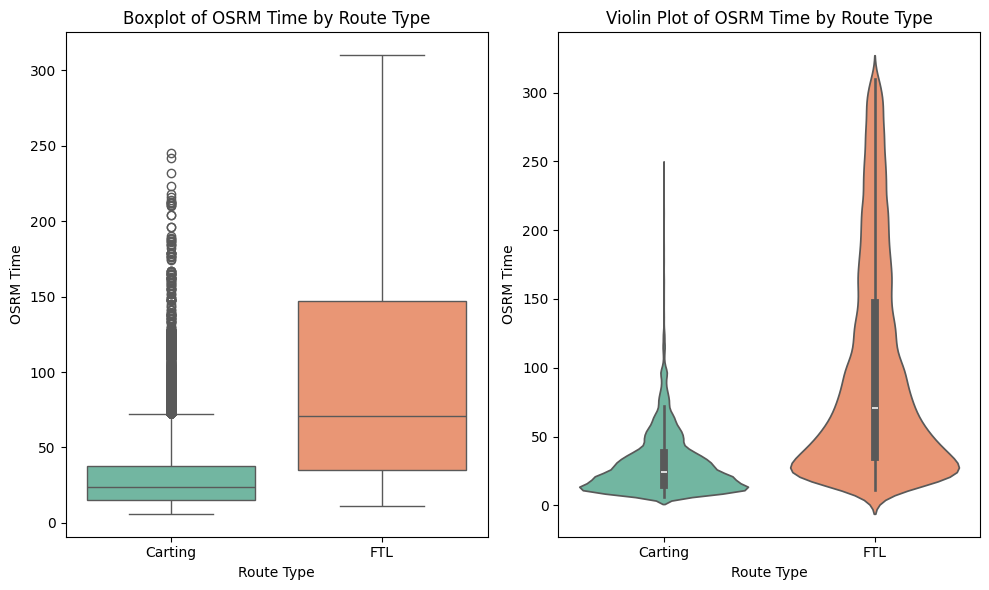

In [382]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='route_type', y='osrm_time', palette='Set2')
plt.title('Boxplot of OSRM Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('OSRM Time')

plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, x='route_type', y='osrm_time', palette='Set2')
plt.title('Violin Plot of OSRM Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('OSRM Time')

plt.tight_layout()
plt.show()

In [386]:
df_clean['trip_time'] = df_clean['trip_time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)

* __Feature Scaling__:

* to perform the feature scaling, we have to train test split the data to avoid data leakage.

In [387]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'trip_year', 'trip_month', 'trip_week', 'trip_day', 'trip_time',
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'osrm_distance',
    'actual_time', 'osrm_time', 'factor', 'segment_osrm_distance',
    'segment_actual_time', 'segment_osrm_time', 'segment_factor', 'od_time_diff_hour'
]
scaler = StandardScaler()

In [388]:
train_df = df_clean[df_clean['data']=='training']
test_df = df_clean[df_clean['data']=='test']

In [389]:
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

In [390]:
df_hypo = pd.concat([train_df,test_df])

In [391]:
len(train_df), len(test_df)

(77585, 28668)

# not performing the feature scaling bcoz we need actual values for hypothesis testing.

# __Feature Engineering__

* __Feature Construction__: already performed in the data preprocessing and EDA above.

In [392]:
df_clean['route_type'] = df_clean['route_type'].replace({'Carting': 0, 'FTL': 1})

In [393]:
df_clean.head(5)

,data,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,14.0,11.0,1.272727,11.9653,14.0,11.0,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
1,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,24.0,20.0,1.200000,9.7590,10.0,9.0,1.111111,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
2,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,40.0,28.0,1.428571,10.8152,16.0,7.0,2.285714,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
3,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,62.0,40.0,1.550000,13.0224,21.0,12.0,1.750000,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
4,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,68.0,44.0,1.545455,3.9153,6.0,5.0,1.200000,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894


* __Feature Selection__

In [394]:
df_clean.head()

,data,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,14.0,11.0,1.272727,11.9653,14.0,11.0,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
1,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,24.0,20.0,1.200000,9.7590,10.0,9.0,1.111111,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
2,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,40.0,28.0,1.428571,10.8152,16.0,7.0,2.285714,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
3,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,62.0,40.0,1.550000,13.0224,21.0,12.0,1.750000,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894
4,training,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,68.0,44.0,1.545455,3.9153,6.0,5.0,1.200000,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894


In [395]:
df_clean.drop('data',axis=1,inplace=True)

In [396]:
df_clean.head(1)

,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,od_end_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,2018,9,38,20,2.583333,0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.9653,14.0,11.0,1.272727,11.9653,14.0,11.0,1.272727,trip-153741093647649320-IND388121AAA-IND388620AAB,1.436894


In [397]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106253 entries, 0 to 144865
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_year                       106253 non-null  int32         
 1   trip_month                      106253 non-null  int32         
 2   trip_week                       106253 non-null  UInt32        
 3   trip_day                        106253 non-null  int32         
 4   trip_time                       106253 non-null  float64       
 5   route_type                      106253 non-null  int64         
 6   source_name                     106253 non-null  object        
 7   destination_name                106253 non-null  object        
 8   od_start_time                   106253 non-null  datetime64[ns]
 9   od_end_time                     106253 non-null  datetime64[ns]
 10  start_scan_to_end_scan          106253 non-null  float64     

In [399]:
df_hypo.head()

,data,trip_year,trip_month,trip_week,trip_day,trip_time,route_type,source_name,destination_name,od_start_time,...,osrm_distance,actual_time,osrm_time,factor,segment_osrm_distance,segment_actual_time,segment_osrm_time,segment_factor,segment_key,od_time_diff_hour
0,training,0.0,0.0,0.203436,0.255864,-1.319086,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,-0.830034,-0.897511,-0.865456,-0.868809,-0.721030,-0.872465,-0.576568,-0.397766,trip-153741093647649320-IND388121AAA-IND388620AAB,-0.677165
1,training,0.0,0.0,0.203436,0.255864,-1.319086,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,-0.727411,-0.826251,-0.737583,-0.953135,-0.933631,-1.102449,-0.804798,-0.487116,trip-153741093647649320-IND388121AAA-IND388620AAB,-0.677165
2,training,0.0,0.0,0.203436,0.255864,-1.319086,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,-0.613681,-0.712235,-0.623918,-0.688112,-0.831855,-0.757473,-1.033027,0.162264,trip-153741093647649320-IND388121AAA-IND388620AAB,-0.677165
3,training,0.0,0.0,0.203436,0.255864,-1.319086,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,-0.476740,-0.555464,-0.453420,-0.547319,-0.619166,-0.469993,-0.462453,-0.133906,trip-153741093647649320-IND388121AAA-IND388620AAB,-0.677165
4,training,0.0,0.0,0.203436,0.255864,-1.319086,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,-0.385715,-0.512708,-0.396588,-0.552590,-1.496736,-1.332433,-1.261257,-0.437974,trip-153741093647649320-IND388121AAA-IND388620AAB,-0.677165


In [414]:
df_clean['actual_time'].mean(), df_clean['segment_actual_time'].mean()

(137.05452081352996, 28.794754030474433)

In [413]:
df_hypo['actual_time'].mean(), df_hypo['segment_actual_time'].mean()

(-0.020625388260887997, -0.021826025629565416)

# __Hypothesis Testing__:

# __1.__
* __H0: actual_distance_to_destination and osrm_distance are _same___
* __HA: actual_distance_to_destination and osrm_distance are _different___
* __Confidence Level: 95%, alpha = 0.05__

In [424]:
actual_distance_to_destination_values = df_hypo['actual_distance_to_destination'].values
osrm_distance_values = df_hypo['osrm_distance'].values
alpha = 0.05
t_stat, p_value = ttest_ind(actual_distance_to_destination_values,osrm_distance_values)
print("t_stat ", t_stat)
print("p value : ", p_value)
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

t_stat  0.18444991015394002
p value :  0.8536606947928379
Fail to reject Null Hypothesis


# __2.__
* __H0: actual_time and osrm_time are _same___
* __HA: actual_time and osrm_time are _different___
* __Confidence Level: 95%, alpha = 0.05__

In [423]:
actual_time_values = df_hypo['actual_time'].values
osrm_time_values = df_hypo['osrm_time'].values
alpha = 0.05
t_stat, p_value = ttest_ind(actual_time_values,osrm_time_values)
print("t_stat ", t_stat)
print("p value : ", p_value)
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

t_stat  0.06619304739191209
p value :  0.9472241942830373
Fail to reject Null Hypothesis


# __3.__
* __H0: actual_time and segment_actual_time are _same___
* __HA: actual_time and segment_actual_time are _different___
* __Confidence Level: 95%, alpha = 0.05__

In [422]:
actual_time_values = df_hypo['actual_time'].values
segment_actual_time_values = df_hypo['segment_actual_time'].values
alpha = 0.05
t_stat, p_value = ttest_ind(actual_time_values,segment_actual_time_values)
print("t_stat ", t_stat)
print("p value : ", p_value)
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

t_stat  0.27833405838564507
p value :  0.780756204623706
Fail to reject Null Hypothesis


# __4.__
* __H0: There is no significant difference in average trip duration (actual_time) across different categories of route_type__
* __HA: There is a significant difference in average trip duration (actual_time) across different categories of route_type__
* __Confidence Level: 95%, alpha = 0.05__

In [404]:
route_types = df_hypo['route_type'].unique()

# Create a list to store dataframes for each route_type category
route_type_data = []

for route_type in route_types:
    route_type_data.append(df_hypo[df_hypo['route_type'] == route_type]['actual_time'])

# Display the data for each route_type category
for i, data in enumerate(route_type_data):
    print(f"Route Type {i}:")
    print(data.head())
    print()

Route Type 0:
0   -0.897511
1   -0.826251
2   -0.712235
3   -0.555464
4   -0.512708
Name: actual_time, dtype: float64

Route Type 1:
10   -0.726487
11   -0.455700
12   -0.163534
13    0.007490
14    0.306782
Name: actual_time, dtype: float64



In [405]:
from scipy.stats import f_oneway
statistic, p_value = f_oneway(*route_type_data)

# Output results
print(f"F-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine significance
alpha = 0.05
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

F-statistic: 25424.1240
P-value: 0.0000
Reject Null Hypothesis


# __5.__
* __H0: There is no significant difference in average trip duration (actual_time) across different categories of source_name or destination_name__
* __HA: There is a significant difference in average trip duration (actual_time) across different categories of source_name or destination_name__
* __Confidence Level: 95%, alpha = 0.05__

In [406]:
source_names = df_hypo['source_name'].unique()

# Create a list to store dataframes for each source_name category
source_name_data = []

for source_name in source_names:
    source_name_data.append(df_hypo[df_hypo['source_name'] == source_name]['actual_time'])

# Display the data for each source_name category
# for i, data in enumerate(source_name_data):
#     print(f"Source Name {i}:")
#     print(data.head())
#     print()

In [407]:
statistic, p_value = f_oneway(*source_name_data)

# Output results
print(f"F-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine significance
alpha = 0.05
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

F-statistic: 30.5669
P-value: 0.0000
Reject Null Hypothesis


# __6.__
* __H0: There is no significant difference in actual_time across different months__
* __HA: There is a significant difference in actual_time across different months__
* __Confidence Level: 95%, alpha = 0.05__

In [408]:
months = sorted(df_hypo['trip_month'].unique())

# Create a list to store actual_time data for each month
month_data = [df_hypo[df_hypo['trip_month'] == month]['actual_time'] for month in months]

# Display data for each month (optional)
for i, data in enumerate(month_data):
    print(f"Month {months[i]}:")
    print(data.head())
    print()

# Perform ANOVA test for trip_month
statistic, p_value = f_oneway(*month_data)

# Output results
print(f"F-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine significance
alpha = 0.05
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Month 0.0:
0   -0.897511
1   -0.826251
2   -0.712235
3   -0.555464
4   -0.512708
Name: actual_time, dtype: float64

Month 1.0:
67   -0.740739
68   -0.334558
69   -0.078022
70    0.221270
71    0.534814
Name: actual_time, dtype: float64

F-statistic: 32.6301
P-value: 0.0000
Reject Null Hypothesis
